## Introduction to Machine Learning

### HW2

Business Analytics

Cha, Ukhyeon (20176022)

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

### Problem 1-2

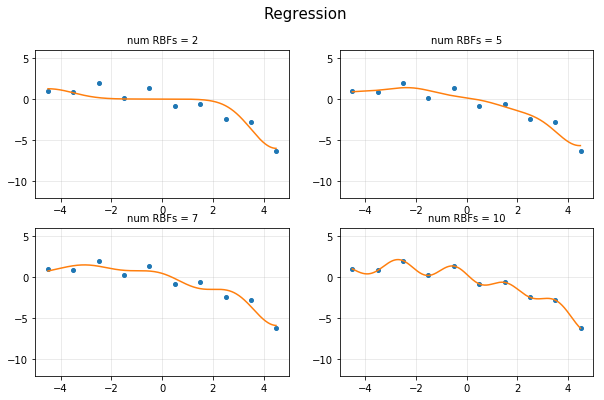

In [2]:
x = np.linspace(-4.5, 4.5, 10).reshape(-1, 1)
y = np.array([0.9819, 0.7973, 1.9737, 0.1838, 1.3180, -0.8361, -0.6591, -2.4701, -2.8122, -6.2512]).reshape(-1, 1)

xp = np.arange(-4.5, 4.5, 0.01).reshape(-1, 1)

d = [2, 5, 7, 10]
sigma = 1

plt.figure(figsize=(10, 6))

for k in range(4):
    u = np.linspace(-4.5, 4.5, d[k])
    
    A = np.hstack([np.exp(-(x-u[i])**2/(2*sigma**2)) for i in range(d[k])])
    rbfbasis = np.hstack([np.exp(-(xp-u[i])**2/(2*sigma**2)) for i in range(d[k])])
    
    A = np.asmatrix(A)
    rbfbasis = np.asmatrix(rbfbasis)
    
    theta = (A.T*A).I*A.T*y
    yp = rbfbasis*theta
    
    plt.subplot(2, 2, k+1)
    plt.plot(x, y, 'o', markersize=4)
    plt.plot(xp, yp)
    plt.axis([-5, 5, -12, 6])
    plt.title('num RBFs = {}'.format(d[k]), fontsize=10)
    plt.grid(alpha=0.3)

plt.suptitle('Regression', fontsize=15)
plt.show()

a proper value of λ on my own is 7

------------------------------------

### Problem 4

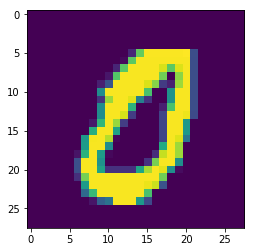

In [3]:
import matplotlib.pyplot as plt
from six.moves import cPickle
data = cPickle.load(open('./data.pkl', 'rb'))
data0 = data['0']
data1 = data['1']

img = data0[10]

plt.imshow(img)

In [4]:
# Convert to binary image

data0 = data0 > 125
data1 = data1 > 125

# Maybe, 125 is RGB value.

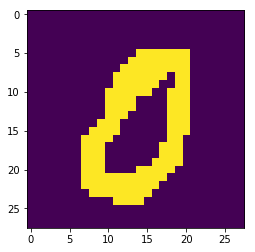

In [5]:
img = data0[10]

plt.imshow(img)

In [6]:
def extract_feature(data):
    phi = []
    for img in data:
        phi.append([1, img[10:20, 10:20].mean(), img.mean()])
    return np.array(phi)

mat0 = extract_feature(data0)
mat1 = extract_feature(data1)

print(mat0.shape); print(mat1.shape)

(1000, 3)
(1000, 3)


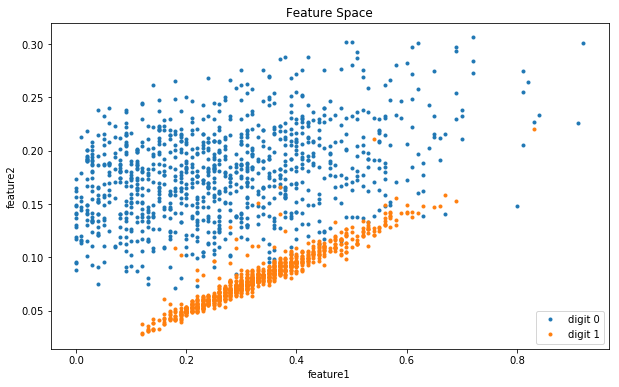

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(mat0[:,1], mat0[:,2], '.', label='digit 0')
plt.plot(mat1[:,1], mat1[:,2], '.', label='digit 1')
plt.legend(loc='lower right')
plt.title("Feature Space")
plt.xlabel("feature1")
plt.ylabel("feature2")
plt.show()

### Problem 5

#### Step1. Initialization

In [8]:
w = np.zeros([3, 1])
w = np.asmatrix(w)

print(w.shape)

(3, 1)


#### Step2. Update ${\omega}$

In [9]:
X = np.concatenate((mat0, mat1), axis=0)
y = np.concatenate((-np.ones([mat0.shape[0], 1]), np.ones([mat1.shape[0], 1])))

X = np.asmatrix(X)
y = np.asmatrix(y)

print(X.shape); print(y.shape)

(2000, 3)
(2000, 1)


In [10]:
import random

wrong = []
n_iter = 100
seq = [i for i in range(1, 2000)]

for k in range(n_iter):
    ng = 0
    for j in range(n_iter):
        i = random.choice(seq)
        yhat = np.sign(X[i,:]*w)
        if y[i] != yhat:
            w += y[i,0]*X[i,:].T
            ng += 1
    wrong.append(ng)

#### Step3. Plot the result

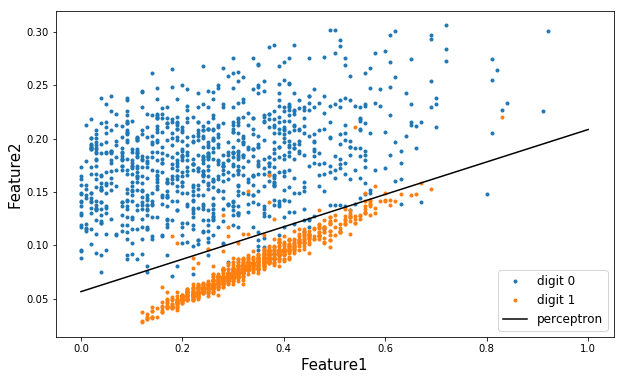

In [11]:
x1p = np.linspace(0,1,100).reshape(-1,1)
x2p = -(w[1,0]/w[2,0]*x1p) - w[0,0]/w[2,0]

plt.figure(figsize=(10, 6))
plt.plot(mat0[:,1], mat0[:,2], '.', label='digit 0')
plt.plot(mat1[:,1], mat1[:,2], '.', label='digit 1')
plt.plot(x1p, x2p, c='k', label='perceptron')
plt.xlabel('Feature1', fontsize = 15)
plt.ylabel('Feature2', fontsize = 15)
plt.legend(loc='lower right', fontsize = 12)

plt.show()

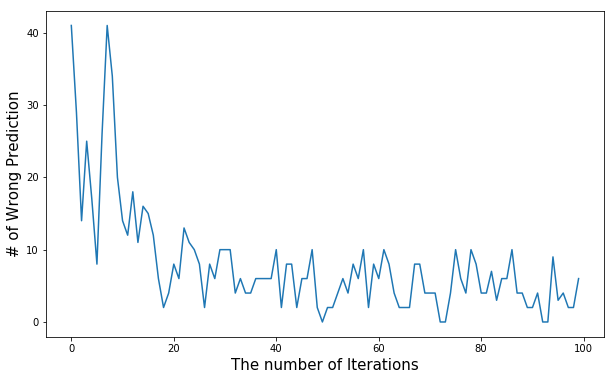

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(wrong)
plt.xlabel('The number of Iterations', fontsize = 15)
plt.ylabel('# of Wrong Prediction', fontsize = 15)

plt.show()

-------------------------------------------------------------